In [163]:
import sys
print(sys.executable)

C:\Users\idowu\AppData\Local\Programs\Python\Python313\python.exe


In [164]:
import sys
import numpy

In [165]:
print(sys.version)

3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]


In [166]:
import numpy as np
import pandas as pd
import sklearn
import xgboost
import imblearn
import joblib

print(np.__version__, pd.__version__, sklearn.__version__, xgboost.__version__, imblearn.__version__ , joblib.__version__)

2.3.2 2.3.2 1.7.1 3.0.4 0.14.0 1.5.1


In [167]:

import warnings
warnings.filterwarnings('ignore')


In [168]:
# Load dataset
df = pd.read_csv("mmc1.csv")

In [169]:
# Rename severe_maleria to severe_malaria
df = df.rename(columns={"severe_maleria": "severe_malaria"})

In [170]:
# Save the dataset back
df.to_csv("mmc1.csv", index=False)

In [171]:
#Check column head
df.head()

,age,sex,fever,cold,rigor,fatigue,headache,bitter_tongue,vomiting,diarrhea,Convulsion,Anemia,jaundice,cocacola_urine,hypoglycemia,prostration,hyperpyrexia,severe_malaria
0,3,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,3,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,3,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,4,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,4,0,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [172]:
#shape of data 
#number of rows
#number of columns

print(f" Dataset shape: {df.shape}")
print(f" Number of patients: {df.shape[0]}")
print(f" Number of features: {df.shape[1]}")

 Dataset shape: (337, 18)
 Number of patients: 337
 Number of features: 18


In [173]:
# Checking for missing values
df.isnull().sum()

age               0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headache          0
bitter_tongue     0
vomiting          0
diarrhea          0
Convulsion        0
Anemia            0
jaundice          0
cocacola_urine    0
hypoglycemia      0
prostration       0
hyperpyrexia      0
severe_malaria    0
dtype: int64

In [174]:
# Summary statistics
df.describe()

,age,sex,fever,cold,rigor,fatigue,headache,bitter_tongue,vomiting,diarrhea,Convulsion,Anemia,jaundice,cocacola_urine,hypoglycemia,prostration,hyperpyrexia,severe_malaria
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,30.347181,0.534125,0.750742,0.566766,0.341246,0.483680,0.700297,0.403561,0.074184,0.338279,0.344214,0.350148,0.658754,0.540059,0.857567,0.219585,0.139466,0.344214
std,14.720853,0.499576,0.433227,0.496259,0.474833,0.500477,0.458809,0.491341,0.262460,0.473828,0.475818,0.477726,0.474833,0.499134,0.350014,0.414581,0.346947,0.475818
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
#Dividing the columns into dependent variables and independent variable(Outcome = Severe_malaria)
#dentify target variable and features

target_col = 'severe_malaria'  # target variable
feature_cols = [col for col in df.columns if col != target_col] # feature variables

print(f"\nTarget Variable: {target_col}")
print("Feature List:")
for i, feat in enumerate(feature_cols, 1):
    print(f" Feature Variables:  {i:2d}. {feat}")


Target Variable: severe_malaria
Feature List:
 Feature Variables:   1. age
 Feature Variables:   2. sex
 Feature Variables:   3. fever
 Feature Variables:   4. cold
 Feature Variables:   5. rigor
 Feature Variables:   6. fatigue
 Feature Variables:   7. headache
 Feature Variables:   8. bitter_tongue
 Feature Variables:   9. vomiting
 Feature Variables:  10. diarrhea
 Feature Variables:  11. Convulsion
 Feature Variables:  12. Anemia
 Feature Variables:  13. jaundice
 Feature Variables:  14. cocacola_urine
 Feature Variables:  15. hypoglycemia
 Feature Variables:  16. prostration
 Feature Variables:  17. hyperpyrexia


In [176]:
import matplotlib.pyplot as plt

# Count how many patients are in each class (0 = negative, 1 = positive)
target_counts = df[target_col].value_counts()


In [177]:
# Calculate the proportion (%) of each class
target_props = df[target_col].value_counts(normalize=True)

In [178]:
# Print distribution of severe malaria in terms of count and percentage
print("Severe Malaria Distribution:")
print(f"  Negative (0): {target_counts[0]} patients ({target_props[0]*100:.1f}%)")
print(f"  Positive (1): {target_counts[1]} patients ({target_props[1]*100:.1f}%)")

Severe Malaria Distribution:
  Negative (0): 221 patients (65.6%)
  Positive (1): 116 patients (34.4%)


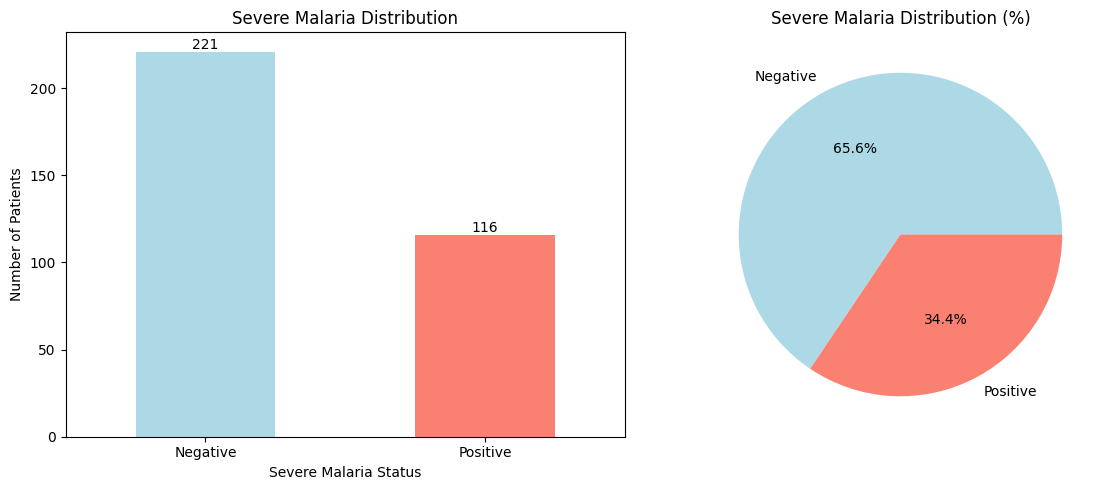

In [179]:
# Create visualization for target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
bars = target_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Severe Malaria Distribution')
axes[0].set_xlabel('Severe Malaria Status')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xticklabels(['Negative', 'Positive'], rotation=0)

# Add labels on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height())}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black')

# Pie chart
axes[1].pie(target_counts.values, labels=['Negative', 'Positive'], 
           autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[1].set_title('Severe Malaria Distribution (%)')

plt.tight_layout()
plt.show()


In [180]:
#  Age Analysis
print("Age Statistics:")
# Get summary statistics for age
age_stats = df['age'].describe()
for stat, value in age_stats.items():
    print(f"  {stat.capitalize()}: {value:.2f}")


Age Statistics:
  Count: 337.00
  Mean: 30.35
  Std: 14.72
  Min: 3.00
  25%: 19.00
  50%: 29.00
  75%: 38.00
  Max: 77.00


In [181]:
# Compare age distribution between patients with and without severe malaria
print("\nAge Distribution by Severe Malaria Status:")
age_by_target = df.groupby(target_col)['age'].describe()
print(age_by_target)


Age Distribution by Severe Malaria Status:
                count       mean        std  min   25%   50%   75%   max
severe_malaria                                                          
0               221.0  29.687783  15.159074  3.0  18.0  29.0  38.0  77.0
1               116.0  31.603448  13.824288  3.0  21.0  31.0  39.0  76.0


In [182]:
# --- Gender Analysis ---
print("\nGender Distribution:")
# Count how many females (0) and males (1)
gender_counts = df['sex'].value_counts()
print(f"  Female (0): {gender_counts[0]} patients ({gender_counts[0]/len(df)*100:.1f}%)")
print(f"  Male (1): {gender_counts[1]} patients ({gender_counts[1]/len(df)*100:.1f}%)")



Gender Distribution:
  Female (0): 157 patients (46.6%)
  Male (1): 180 patients (53.4%)


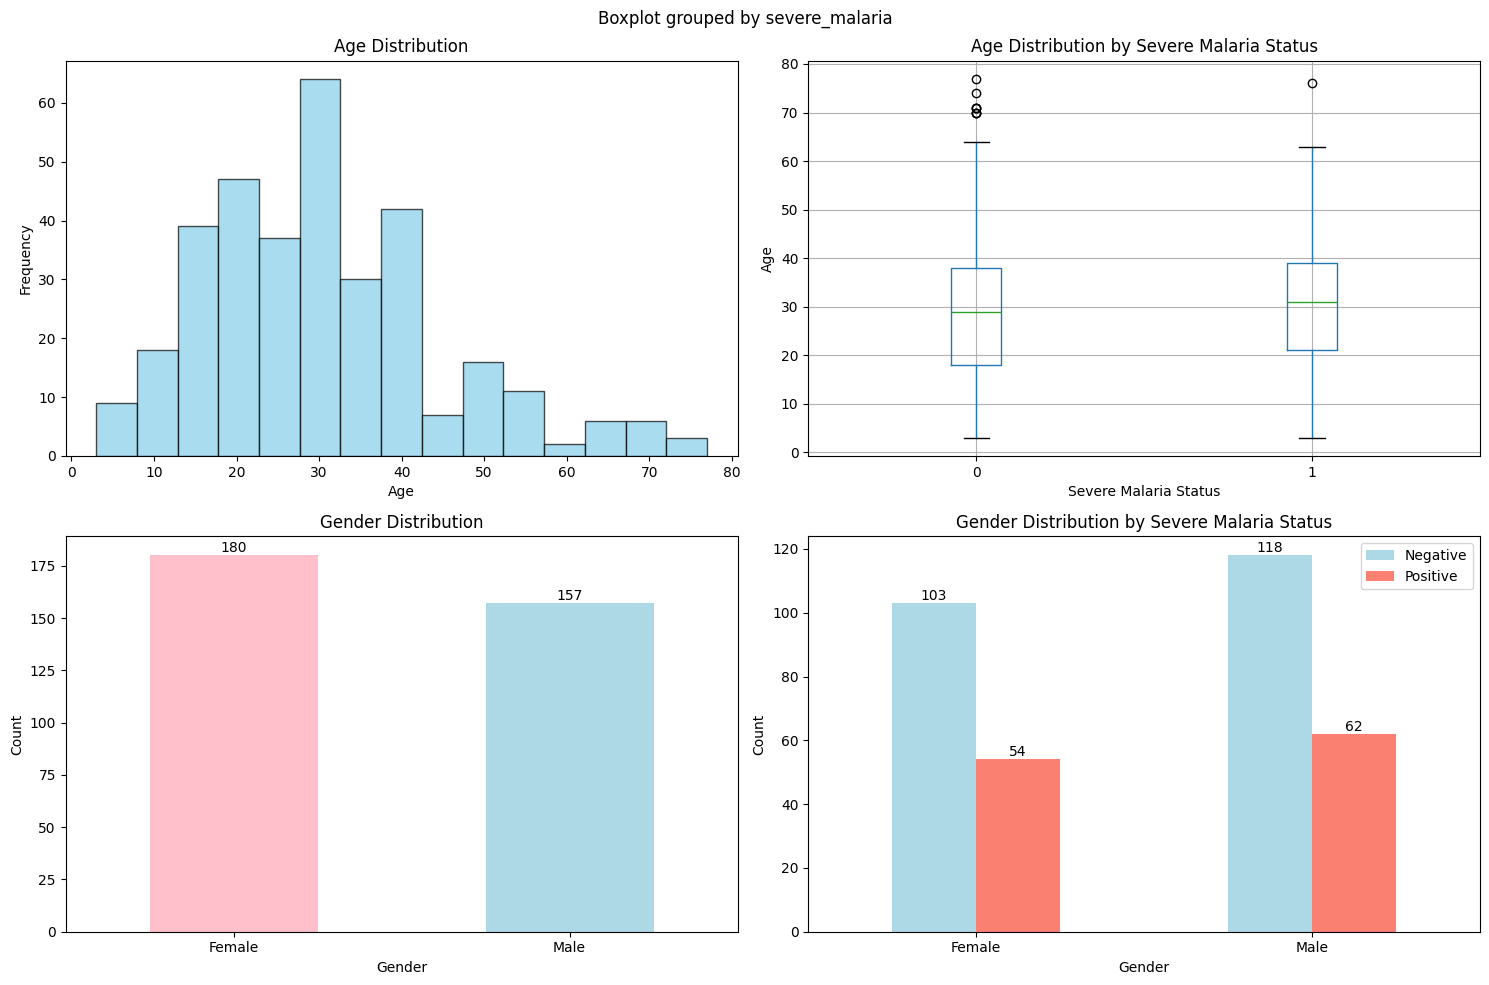

In [183]:
# Create a figure with 4 plots arranged in a 2x2 grid 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Age distribution (histogram)
axes[0,0].hist(df['age'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# 2. Age distribution by malaria status (boxplot)
df.boxplot(column='age', by=target_col, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Severe Malaria Status')
axes[0,1].set_xlabel('Severe Malaria Status')
axes[0,1].set_ylabel('Age')

# 3. Gender distribution (bar chart)
bars1 = gender_counts.plot(kind='bar', ax=axes[1,0], color=['pink', 'lightblue'])
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticklabels(['Female', 'Male'], rotation=0)

# Add labels on bars (gender counts)
for p in axes[1,0].patches:
    axes[1,0].annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

# 4. Gender vs malaria status  (simple comparison table)
gender_target_ct = pd.crosstab(df['sex'], df[target_col])
bars2 = gender_target_ct.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
axes[1,1].set_title('Gender Distribution by Severe Malaria Status')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1,1].legend(['Negative', 'Positive'])

# Add labels on bars (crosstab counts)
for p in axes[1,1].patches:
    axes[1,1].annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [184]:
# Get symptom columns (excluding age, sex, and target)
symptom_cols = [col for col in feature_cols if col not in ['age_group', 'sex', 'age']]
print(f"Number of symptoms analyzed: {len(symptom_cols)}")

# Convert symptom columns to numeric 
for col in symptom_cols:
    if df[col].dtype == 'object':  
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Present': 1, 'Absent': 0})
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)



Number of symptoms analyzed: 15


In [185]:
# Calculate symptom frequencies
print("SYMPTOM FREQUENCY ANALYSIS")
print("-" * 30)
symptom_freq = df[symptom_cols].sum().sort_values(ascending=False)
symptom_perc = (symptom_freq / len(df) * 100).round(2)

print("Symptom Frequency (Most to Least Common):")
for i, (symptom, freq) in enumerate(symptom_freq.items(), 1):
    print(f"{i:2d}. {symptom:15s}: {freq:3d} patients ({symptom_perc[symptom]:5.1f}%)")

SYMPTOM FREQUENCY ANALYSIS
------------------------------
Symptom Frequency (Most to Least Common):
 1. hypoglycemia   : 289 patients ( 85.8%)
 2. fever          : 253 patients ( 75.1%)
 3. headache       : 236 patients ( 70.0%)
 4. jaundice       : 222 patients ( 65.9%)
 5. cold           : 191 patients ( 56.7%)
 6. cocacola_urine : 182 patients ( 54.0%)
 7. fatigue        : 163 patients ( 48.4%)
 8. bitter_tongue  : 136 patients ( 40.4%)
 9. Anemia         : 118 patients ( 35.0%)
10. Convulsion     : 116 patients ( 34.4%)
11. rigor          : 115 patients ( 34.1%)
12. diarrhea       : 114 patients ( 33.8%)
13. prostration    :  74 patients ( 22.0%)
14. hyperpyrexia   :  47 patients ( 13.9%)
15. vomiting       :  25 patients (  7.4%)


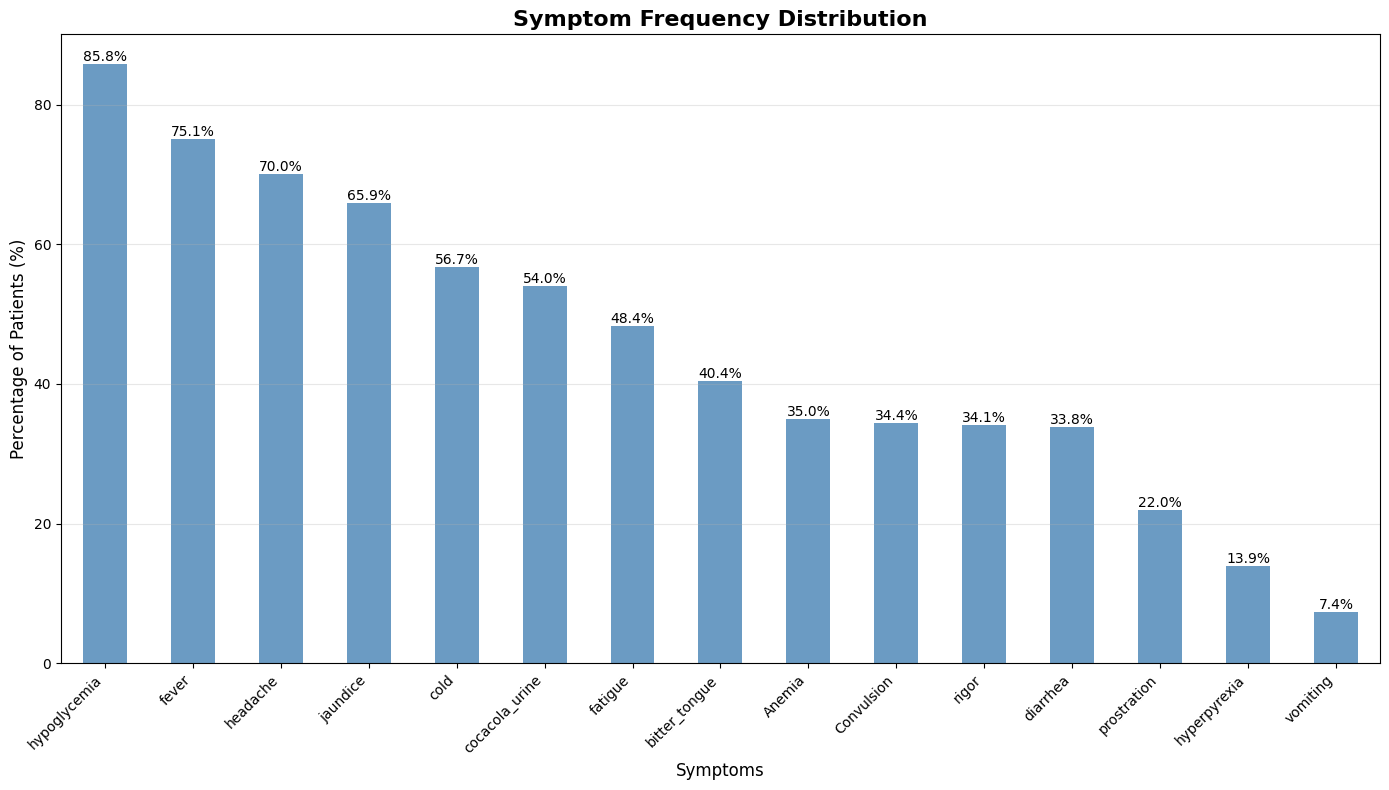

SYMPTOM CORRELATION WITH TARGET


In [186]:
# Visualize symptom frequencies
plt.figure(figsize=(14, 8))
bars = symptom_perc.plot(kind='bar', color='steelblue', alpha=0.8)

plt.title('Symptom Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add labels on top of each bar
for p in bars.patches:
    plt.annotate(f"{p.get_height():.1f}%",  
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("SYMPTOM CORRELATION WITH TARGET")


In [187]:
# Calculate correlation between symptoms and target
symptom_target_corr = df[symptom_cols + [target_col]].corr()[target_col].drop(target_col)
symptom_target_corr = symptom_target_corr.sort_values(ascending=False)

print("Symptom Correlation with Severe Malaria (Highest to Lowest):")
for i, (symptom, corr) in enumerate(symptom_target_corr.items(), 1):
    print(f"{i:2d}. {symptom:15s}: {corr:6.3f}")

Symptom Correlation with Severe Malaria (Highest to Lowest):
 1. headache       :  0.147
 2. hypoglycemia   :  0.117
 3. diarrhea       :  0.116
 4. cold           :  0.066
 5. cocacola_urine :  0.055
 6. fatigue        :  0.049
 7. rigor          :  0.032
 8. fever          :  0.013
 9. jaundice       :  0.008
10. bitter_tongue  : -0.010
11. vomiting       : -0.014
12. Anemia         : -0.021
13. hyperpyrexia   : -0.021
14. Convulsion     : -0.052
15. prostration    : -0.113


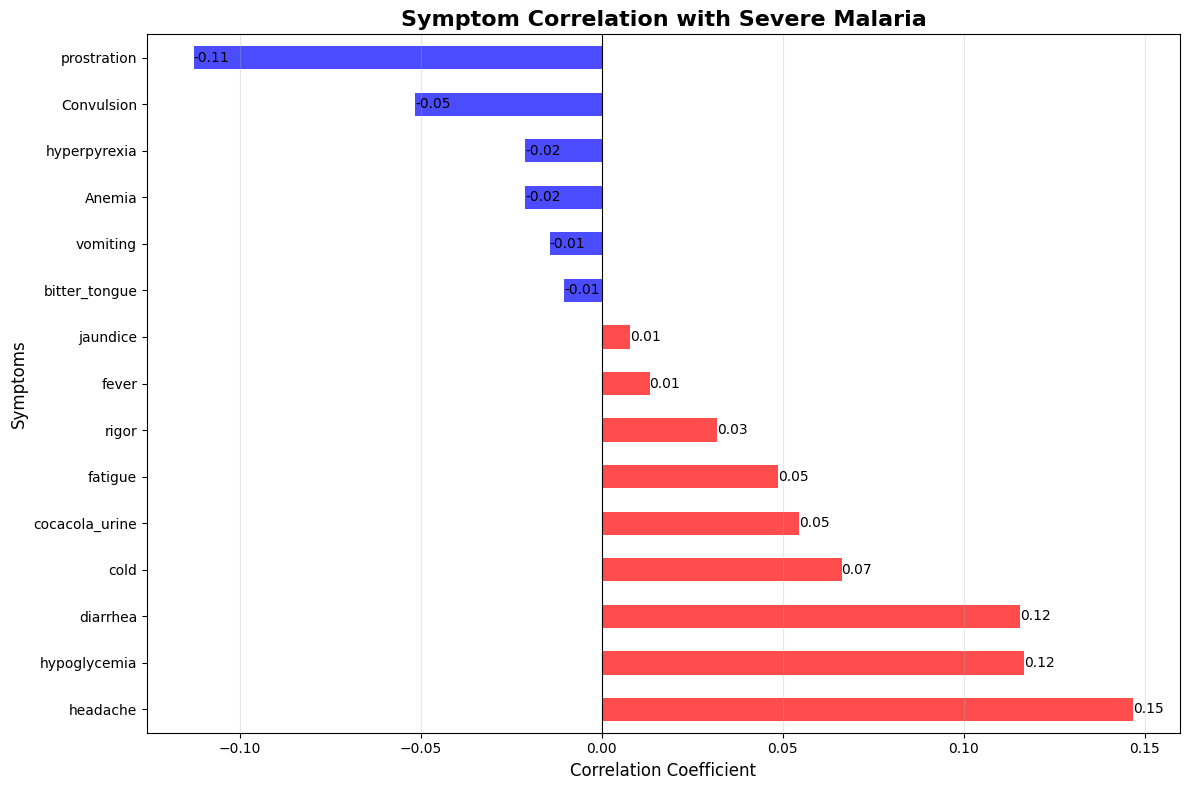

In [188]:
# Visualize correlations
plt.figure(figsize=(12, 8))

# Color bars: red = positive correlation, blue = negative correlation
colors = ['red' if x > 0 else 'blue' for x in symptom_target_corr.values]

bars = symptom_target_corr.plot(kind='barh', color=colors, alpha=0.7)

plt.title('Symptom Correlation with Severe Malaria', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Symptoms', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8) 
plt.grid(axis='x', alpha=0.3)

# Add labels at the end of each bar
for p in bars.patches:
    plt.annotate(f"{p.get_width():.2f}",  # to 2 dp
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, accuracy_score,
                           precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [191]:
# Create comprehensive sample dataset
def create_extended_malaria_dataset(n_samples=337):
   
    np.random.seed(RANDOM_STATE)
    
    # Base symptoms and their probabilities for different scenarios
    symptoms = ['fever', 'cold', 'rigor', 'fatigue', 'headache', 'bitter_tongue', 
                'vomiting', 'diarrhea', 'Convulsion', 'Anemia', 'jaundice', 
                'cocacola_urine', 'hypoglycemia', 'prostration', 'hyperpyrexia']
    
    data = []
    
    for i in range(n_samples):
        # Generate age (3-77 range as per original data)
        age = np.random.randint(3, 78)
        
        # Generate sex (0=female, 1=male)
        sex = np.random.randint(0, 2)
        
        
        # Severe malaria cases (30% of data)
        if i < n_samples * 0.3:
            severe_malaria = 1
            # Higher probability of severe symptoms
            symptoms_prob = [0.95, 0.8, 0.7, 0.9, 0.8, 0.4, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.4, 0.15]
        else:
            severe_malaria = 0
            # Lower probability of severe symptoms
            symptoms_prob = [0.8, 0.6, 0.5, 0.7, 0.6, 0.2, 0.15, 0.2, 0.05, 0.2, 0.05, 0.03, 0.1, 0.15, 0.02]
        
        # Generate symptoms based on probabilities
        patient_symptoms = [1 if np.random.random() < prob else 0 for prob in symptoms_prob]
        
        # Create patient record
        patient = [age, sex] + patient_symptoms + [severe_malaria]
        data.append(patient)
    
    # Create DataFrame
    columns = ['age', 'sex'] + symptoms + ['severe_malaria']
    df = pd.DataFrame(data, columns=columns)
    
    return df

In [192]:
# Generate dataset
df = create_extended_malaria_dataset(337)
print(f" Dataset created: {df.shape[0]} patients, {df.shape[1]} features")

 Dataset created: 337 patients, 18 features


In [193]:
#FEATURE ENGINEERING

df_engineered = df.copy()

In [194]:
# Age groups
def categorize_age(age):
    if age <= 12:
        return 0  # Child
    elif age <= 30:
        return 1  # Youth
    else:
        return 2  # Adult

df_engineered['age_group'] = df_engineered['age'].apply(categorize_age)

In [195]:
# Symptom counts and scores
symptom_cols = ['fever', 'cold', 'rigor', 'fatigue', 'headache', 'bitter_tongue',
                'vomiting', 'diarrhea', 'Convulsion', 'Anemia', 'jaundice',
                'cocacola_urine', 'hypoglycemia', 'prostration', 'hyperpyrexia']

df_engineered['symptom_count'] = df_engineered[symptom_cols].sum(axis=1)

In [196]:
# Severity score (severe symptoms)
severe_symptoms = ['jaundice', 'hyperpyrexia', 'Convulsion', 'cocacola_urine']
df_engineered['severity_score'] = df_engineered[severe_symptoms].sum(axis=1)

In [197]:
# GI symptoms
gi_symptoms = ['vomiting', 'diarrhea', 'bitter_tongue']
df_engineered['gi_symptoms'] = df_engineered[gi_symptoms].sum(axis=1)

In [198]:
# Neurological symptoms
neuro_symptoms = ['headache', 'Convulsion']
df_engineered['neuro_symptoms'] = df_engineered[neuro_symptoms].sum(axis=1)

In [199]:
# Interaction features
df_engineered['age_symptom_interaction'] = df_engineered['age'] * df_engineered['symptom_count']
df_engineered['fever_severity'] = df_engineered['fever'] * df_engineered['severity_score']

In [200]:
print(f" Total features: {df_engineered.shape[1] - 1} (excluding target)")

 Total features: 24 (excluding target)


In [201]:
# Prepare features and target
X = df_engineered.drop(['severe_malaria'], axis=1)
y = df_engineered['severe_malaria']

In [202]:
print(f"\nDataset Summary:")
print(f"  Samples: {X.shape[0]}")
print(f"  Features: {X.shape[1]}")
print(f"  Target distribution: {dict(y.value_counts())}")


Dataset Summary:
  Samples: 337
  Features: 24
  Target distribution: {0: np.int64(235), 1: np.int64(102)}


In [203]:
df.head()

,age,sex,fever,cold,rigor,fatigue,headache,bitter_tongue,vomiting,diarrhea,Convulsion,Anemia,jaundice,cocacola_urine,hypoglycemia,prostration,hyperpyrexia,severe_malaria
0,54,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1
1,60,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1
2,20,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1
3,6,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,62,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1


In [204]:
# TRAIN-TEST SPLIT AND DATA PREPROCESSING
# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

In [205]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [206]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [207]:
print(f"\nAfter SMOTE balancing:")
print(f"  Training samples: {X_train_balanced.shape[0]}")
print(f"  Balanced target distribution: {dict(pd.Series(y_train_balanced).value_counts())}")


After SMOTE balancing:
  Training samples: 376
  Balanced target distribution: {0: np.int64(188), 1: np.int64(188)}


In [208]:
# BASELINE MODEL BUILDING


# Initialize results storage
results = {}
models = {}

In [209]:
# -------------------------------
# LOGISTIC REGRESSION MODEL
# -------------------------------
lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Logistic Regression'] = lr_model

print("Logistic Regression trained successfully")

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Store results
results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'roc_auc': lr_auc
}

print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"ROC-AUC:   {lr_auc:.4f}")

# Feature importance
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 10 Most Important Features (Logistic Regression):")
for i, row in feature_importance_lr.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['coefficient']:6.3f}")

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std()*2:.4f})")



Logistic Regression trained successfully
Accuracy:  0.8676
Precision: 0.7500
Recall:    0.8571
F1-Score:  0.8000
ROC-AUC:   0.9321

Top 10 Most Important Features (Logistic Regression):
  cold                :  1.030
  symptom_count       :  0.948
  fatigue             :  0.698
  Anemia              :  0.589
  severity_score      :  0.569
  jaundice            :  0.557
  hyperpyrexia        :  0.433
  fever               :  0.423
  age_group           :  0.379
  hypoglycemia        :  0.375

5-Fold Cross-Validation Accuracy: 0.8406 (±0.1286)


In [210]:
# -------------------------------
# DECISION TREE MODEL
# -------------------------------
dt_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Decision Tree'] = dt_model

print("Decision Tree trained successfully")

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Store results
results['Decision Tree'] = {
    'accuracy': dt_accuracy,
    'precision': dt_precision,
    'recall': dt_recall,
    'f1_score': dt_f1,
    'roc_auc': dt_auc
}

print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print(f"ROC-AUC:   {dt_auc:.4f}")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (Decision Tree):")
for i, row in feature_importance_dt.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std()*2:.4f})")



Decision Tree trained successfully
Accuracy:  0.8088
Precision: 0.7222
Recall:    0.6190
F1-Score:  0.6667
ROC-AUC:   0.8916

Top 10 Most Important Features (Decision Tree):
  symptom_count       :  0.730
  hyperpyrexia        :  0.062
  rigor               :  0.046
  age                 :  0.034
  vomiting            :  0.022
  severity_score      :  0.020
  age_symptom_interaction:  0.017
  neuro_symptoms      :  0.014
  headache            :  0.013
  hypoglycemia        :  0.013

5-Fold Cross-Validation Accuracy: 0.8115 (±0.1558)


In [211]:
# -------------------------------
# RANDOM FOREST MODEL
# -------------------------------
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    rf_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid_search.fit(X_train_balanced, y_train_balanced)
rf_model = rf_grid_search.best_estimator_

print(f"Best parameters (RF): {rf_grid_search.best_params_}")
print(f"Best CV score (RF): {rf_grid_search.best_score_:.4f}")

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Random Forest'] = rf_model

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Store results
results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1_score': rf_f1,
    'roc_auc': rf_auc
}

print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_auc:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (Random Forest):")
for i, row in feature_importance_rf.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")



Best parameters (RF): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score (RF): 0.9512
Accuracy:  0.9265
Precision: 0.8636
Recall:    0.9048
F1-Score:  0.8837
ROC-AUC:   0.9382

Top 10 Most Important Features (Random Forest):
  symptom_count       :  0.276
  age_symptom_interaction:  0.089
  fever_severity      :  0.081
  severity_score      :  0.080
  Anemia              :  0.052
  age                 :  0.048
  jaundice            :  0.045
  hypoglycemia        :  0.042
  cold                :  0.039
  gi_symptoms         :  0.035


In [212]:
# -------------------------------
# GRADIENT BOOSTING MODEL WITH GRIDSEARCHCV
# -------------------------------
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

gb_grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=RANDOM_STATE),
    gb_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

gb_grid_search.fit(X_train_balanced, y_train_balanced)
gb_model = gb_grid_search.best_estimator_

print(f"Best parameters (GB): {gb_grid_search.best_params_}")
print(f"Best CV score (GB): {gb_grid_search.best_score_:.4f}")

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Gradient Boosting'] = gb_model

# Calculate metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_pred_proba_gb)

# Store results
results['Gradient Boosting'] = {
    'accuracy': gb_accuracy,
    'precision': gb_precision,
    'recall': gb_recall,
    'f1_score': gb_f1,
    'roc_auc': gb_auc
}

print(f"Accuracy:  {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall:    {gb_recall:.4f}")
print(f"F1-Score:  {gb_f1:.4f}")
print(f"ROC-AUC:   {gb_auc:.4f}")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (Gradient Boosting):")
for i, row in feature_importance_gb.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")

# Cross-validation
cv_scores_gb = cross_val_score(gb_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_gb.mean():.4f} (±{cv_scores_gb.std()*2:.4f})")



Best parameters (GB): {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score (GB): 0.9399
Accuracy:  0.8971
Precision: 0.8500
Recall:    0.8095
F1-Score:  0.8293
ROC-AUC:   0.9200

Top 10 Most Important Features (Gradient Boosting):
  symptom_count       :  0.625
  age_symptom_interaction:  0.065
  age                 :  0.048
  hyperpyrexia        :  0.043
  jaundice            :  0.023
  rigor               :  0.023
  diarrhea            :  0.019
  severity_score      :  0.018
  sex                 :  0.018
  hypoglycemia        :  0.017

5-Fold Cross-Validation Accuracy: 0.8620 (±0.1412)


In [213]:
# -------------------------------
# XGBOOST MODEL WITH GRIDSEARCHCV
# -------------------------------
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid_search = GridSearchCV(
    XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss'),
    xgb_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

xgb_grid_search.fit(X_train_balanced, y_train_balanced)
xgb_model = xgb_grid_search.best_estimator_

print(f"Best parameters (XGB): {xgb_grid_search.best_params_}")
print(f"Best CV score (XGB): {xgb_grid_search.best_score_:.4f}")

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['XGBoost'] = xgb_model

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Store results
results['XGBoost'] = {
    'accuracy': xgb_accuracy,
    'precision': xgb_precision,
    'recall': xgb_recall,
    'f1_score': xgb_f1,
    'roc_auc': xgb_auc
}

print(f"Accuracy:  {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall:    {xgb_recall:.4f}")
print(f"F1-Score:  {xgb_f1:.4f}")
print(f"ROC-AUC:   {xgb_auc:.4f}")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (XGBoost):")
for i, row in feature_importance_xgb.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f} (±{cv_scores_xgb.std()*2:.4f})")


Best parameters (XGB): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV score (XGB): 0.9470
Accuracy:  0.8824
Precision: 0.8095
Recall:    0.8095
F1-Score:  0.8095
ROC-AUC:   0.9331

Top 10 Most Important Features (XGBoost):
  symptom_count       :  0.217
  hyperpyrexia        :  0.091
  severity_score      :  0.083
  hypoglycemia        :  0.054
  jaundice            :  0.054
  fatigue             :  0.051
  fever               :  0.048
  headache            :  0.035
  age_group           :  0.034
  cocacola_urine      :  0.032

5-Fold Cross-Validation Accuracy: 0.8780 (±0.1502)


In [214]:
# -------------------------------
# COMPARE MODELS AND SELECT BEST BASED ON ROC-AUC
# -------------------------------

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Sort models by ROC-AUC descending
results_df_sorted = results_df.sort_values(by='roc_auc', ascending=False)

print("\nModel Ranking Based on ROC-AUC:")
print(results_df_sorted[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']])

# Identify the best model
best_model_name = results_df_sorted.index[0]
best_model_metrics = results_df_sorted.iloc[0]
best_model_instance = models[best_model_name]

print(f"\nBest Performing Model: {best_model_name}")
print(f"ROC-AUC: {best_model_metrics['roc_auc']:.4f}")
print(f"Other metrics: Accuracy={best_model_metrics['accuracy']:.4f}, "
      f"Precision={best_model_metrics['precision']:.4f}, "
      f"Recall={best_model_metrics['recall']:.4f}, "
      f"F1-Score={best_model_metrics['f1_score']:.4f}")

#  save the best model and scaler for deployment
joblib.dump(best_model_instance, f'best_model_{best_model_name.replace(" ", "_")}.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(f"\nBest model and scaler saved for deployment.")



Model Ranking Based on ROC-AUC:
                     accuracy  precision    recall  f1_score   roc_auc
Random Forest        0.926471   0.863636  0.904762  0.883721  0.938197
XGBoost              0.882353   0.809524  0.809524  0.809524  0.933131
Logistic Regression  0.867647   0.750000  0.857143  0.800000  0.932118
Gradient Boosting    0.897059   0.850000  0.809524  0.829268  0.919959
Decision Tree        0.808824   0.722222  0.619048  0.666667  0.891591

Best Performing Model: Random Forest
ROC-AUC: 0.9382
Other metrics: Accuracy=0.9265, Precision=0.8636, Recall=0.9048, F1-Score=0.8837

Best model and scaler saved for deployment.


In [215]:
joblib.dump(rf_model, "severe_malaria_prediction_app.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [216]:
print(df.columns.tolist())

['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headache', 'bitter_tongue', 'vomiting', 'diarrhea', 'Convulsion', 'Anemia', 'jaundice', 'cocacola_urine', 'hypoglycemia', 'prostration', 'hyperpyrexia', 'severe_malaria']


In [217]:
print(scaler.n_features_in_)


24


In [218]:
feature_columns = X.columns.tolist()
print(feature_columns)

['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headache', 'bitter_tongue', 'vomiting', 'diarrhea', 'Convulsion', 'Anemia', 'jaundice', 'cocacola_urine', 'hypoglycemia', 'prostration', 'hyperpyrexia', 'age_group', 'symptom_count', 'severity_score', 'gi_symptoms', 'neuro_symptoms', 'age_symptom_interaction', 'fever_severity']


In [219]:
import streamlit as st
import numpy as np
import joblib

# Load your trained model and scaler
model = joblib.load('severe_malaria_prediction_app.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Malaria Prediction App (Severe Malaria Risk)")

# -------------------------
# User Inputs
# -------------------------
age = st.number_input("Age", min_value=0, max_value=100, value=20)
sex = st.selectbox("Gender", ["Female", "Male"])
sex_encoded = 1 if sex == "Male" else 0

# Symptoms (1 = Yes, 0 = No)
symptom_names = [
    "Fever", "Cold", "Rigor", "Fatigue", "Headache", "Bitter Tongue",
    "Vomiting", "Diarrhea", "Convulsion", "Anemia", "Jaundice",
    "Coca-cola Urine", "Hypoglycemia", "Prostration", "Hyperpyrexia"
]

symptom_values = {}
for symptom in symptom_names:
    symptom_values[symptom] = st.selectbox(symptom, [0, 1], index=0)

# -------------------------
# Custom Threshold
# -------------------------
threshold = st.slider(
    "Set probability threshold for severe malaria",
    0.0, 1.0, 0.4, 0.05
)

# -------------------------
# Feature Engineering
# -------------------------
fever = symptom_values["Fever"]
cold = symptom_values["Cold"]
rigor = symptom_values["Rigor"]
fatigue = symptom_values["Fatigue"]
headache = symptom_values["Headache"]
bitter_tongue = symptom_values["Bitter Tongue"]
vomiting = symptom_values["Vomiting"]
diarrhea = symptom_values["Diarrhea"]
convulsion = symptom_values["Convulsion"]
anemia = symptom_values["Anemia"]
jaundice = symptom_values["Jaundice"]
cocacola_urine = symptom_values["Coca-cola Urine"]
hypoglycemia = symptom_values["Hypoglycemia"]
prostration = symptom_values["Prostration"]
hyperpyrexia = symptom_values["Hyperpyrexia"]

severity_score = sum([
    cold, cocacola_urine, prostration, convulsion,
    hypoglycemia, anemia, jaundice, hyperpyrexia
])
age_group = 0 if age <= 12 else 1 if age <= 30 else 2
symptom_count = sum(symptom_values.values())
gi_symptoms = vomiting + diarrhea + bitter_tongue
neuro_symptoms = headache + convulsion
age_symptom_interaction = age * symptom_count
fever_severity = fever * severity_score

# -------------------------
# Create feature array in exact order
# -------------------------
features = np.array([[
    age, sex_encoded, fever, cold, rigor, fatigue, headache, bitter_tongue,
    vomiting, diarrhea, convulsion, anemia, jaundice, cocacola_urine,
    hypoglycemia, prostration, hyperpyrexia, severity_score, age_group,
    symptom_count, gi_symptoms, neuro_symptoms, age_symptom_interaction,
    fever_severity
]])

# -------------------------
# Scale features
# -------------------------
features_scaled = scaler.transform(features)

# -------------------------
# Make prediction
# -------------------------
probability = model.predict_proba(features_scaled)[0][1]
prediction = 1 if probability >= threshold else 0

# -------------------------
# Display result
# -------------------------
st.subheader("Prediction Result")
st.write(f"Predicted Severe Malaria Status: **{'Positive' if prediction == 1 else 'Negative'}**")
st.write(f"Probability of Severe Malaria: **{probability:.2%}**")
st.write(f"Threshold used: **{threshold:.0%}**")


2025-09-18 07:37:24.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 07:37:24.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar